## Линейная регрессия

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('../data/auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [69]:
df['horsepower'].unique()
df['horsepower']=df['horsepower'].map(lambda x: np.nan if x == '?' else int(x))
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<AxesSubplot:>

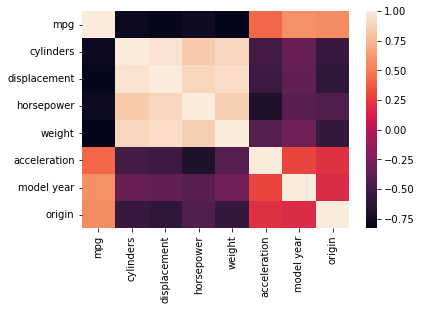

In [70]:
sns.heatmap(df.corr())

In [71]:
X, y = df.drop(['car name','mpg'],axis=1), df['mpg']
X.shape, y.shape

((398, 7), (398,))

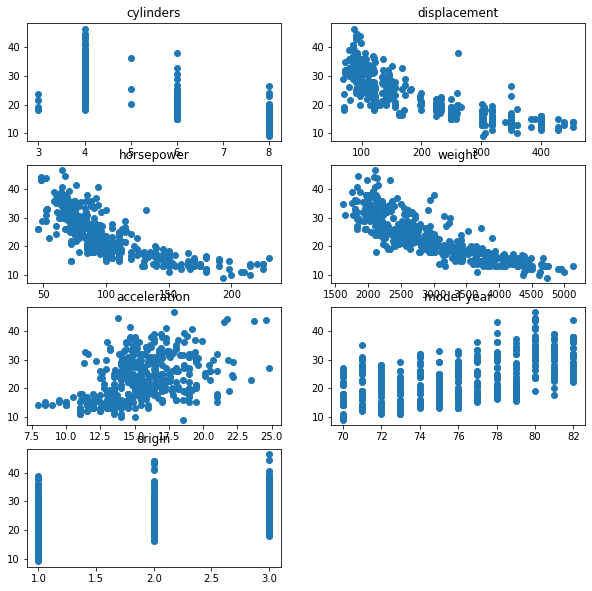

In [72]:
plt.figure(figsize=(10,10))
for i, col in enumerate(X.columns):
    plt.subplot(4, 2, i+1)
    plt.scatter(X[col], y)
    plt.title(col);

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

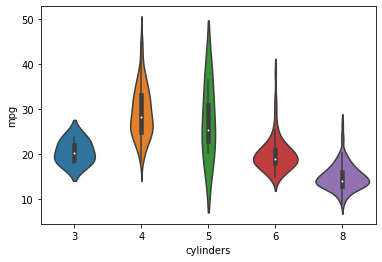

In [73]:
sns.violinplot(x=df['cylinders'], y=y)

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [76]:
linreg.fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

3.1694349024652757

<AxesSubplot:>

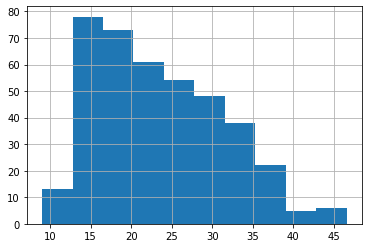

In [77]:
y.hist()

In [88]:
pd.DataFrame(linreg.coef_,X.columns,columns=['coef'])

,coef
cylinders,-0.522545
displacement,0.022826
horsepower,-0.017001
weight,-0.006781
acceleration,0.136778
model year,0.734966
origin,1.539970


In [79]:
def display_coefs(X,y,model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
    model.fit(X_train,y_train)
    print('Score: %s' % np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    print(pd.DataFrame(model.coef_,X.columns,columns=['coef']))

In [80]:
display_coefs(X,y,linreg)

Score: 3.1694349024652757
                  coef
cylinders    -0.522545
displacement  0.022826
horsepower   -0.017001
weight       -0.006781
acceleration  0.136778
model year    0.734966
origin        1.539970


In [81]:
display_coefs(X,y,Lasso(alpha=0.1))

Score: 3.1584937142641487
                  coef
cylinders    -0.124151
displacement  0.014012
horsepower   -0.014111
weight       -0.006799
acceleration  0.114201
model year    0.726669
origin        1.229522


In [82]:
display_coefs(X,y,Ridge(alpha=3))

Score: 3.167394800538701
                  coef
cylinders    -0.497214
displacement  0.022121
horsepower   -0.016465
weight       -0.006791
acceleration  0.136811
model year    0.734278
origin        1.494684


In [83]:
from sklearn.preprocessing import PolynomialFeatures

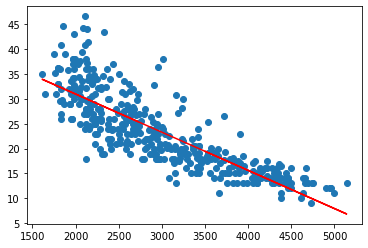

4.333698159150957


In [84]:
X_feature = X['weight'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_feature, y)
y_pred = model.predict(X_feature)

plt.scatter(X_feature, y)
plt.plot(X_feature, y_pred, color='r')
plt.show()

print(np.sqrt(mean_squared_error(y,y_pred)))

4.1688973107398


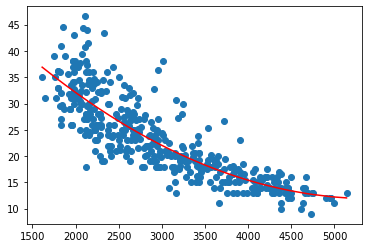

In [85]:
X_feature = X['weight'].values.reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_feature)
poly_model = LinearRegression()
poly_model.fit(X_poly,y)
y_poly_pred = poly_model.predict(X_poly)

print(np.sqrt(mean_squared_error(y,y_poly_pred)))

plt.scatter(X_feature, y)
sorted_zip = sorted(zip(X_feature,y_poly_pred))
X_feature,y_poly_pred = zip(*sorted_zip)
plt.plot(X_feature, y_poly_pred, color='r')
plt.show()


In [86]:
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

lasso.fit(X_poly_train, y_train)
y_poly_pred = lasso.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test,y_poly_pred)))

2.80381324788359


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+03, tolerance: 1.731e+00
  model = cd_fast.enet_coordinate_descent(


[Линейные модели на Хабре](https://habr.com/ru/company/ods/blog/323890/)

[Видео с визуализацией использования Ridge и Lasso](https://www.youtube.com/watch?v=Xm2C_gTAl8c)

🛠 Построить модели регресии для банковского датасета, сравнить rmse.

In [87]:
df = pd.read_csv('../data/bank.csv')
y=df['EstimatedSalary']
df.head()
# Ваш код здесь

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
